차량용, 보트용 및 기타 운송장비용 가스를 충전하여 주는 산업활동을 말한다.  

<예시>  
·차량용 가스 연료 소매  
·차량용 가스 충전소  
·보트용 가스 연료 소매  
·보트용 가스 충전소  

<제외>  
·가스 연료 도매(46713)  
·가정용 가스 연료 소매(47723)  

In [1]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [2]:
data = pd.read_csv("업종별/차량용 가스 충전업.csv", encoding='utf-8', index_col=0,parse_dates=['REG_YYMM'])

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218242 entries, 0 to 218241
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      218242 non-null  object
 1   CARD_SIDO_NM  218242 non-null  object
 2   CARD_CCG_NM   217176 non-null  object
 3   STD_CLSS_NM   218242 non-null  object
 4   HOM_SIDO_NM   218242 non-null  object
 5   HOM_CCG_NM    216483 non-null  object
 6   AGE           218242 non-null  object
 7   SEX_CTGO_CD   218242 non-null  int64 
 8   FLC           218242 non-null  int64 
 9   CSTMR_CNT     218242 non-null  int64 
 10  AMT           218242 non-null  int64 
 11  CNT           218242 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.6+ MB
None


In [4]:
#안쓰는 컬럼 드랍, 정제
df=data.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'STD_CLSS_NM'], axis=1)
df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))

In [5]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218242 entries, 0 to 218241
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      218242 non-null  object
 1   CARD_SIDO_NM  218242 non-null  object
 2   HOM_SIDO_NM   218242 non-null  object
 3   AGE           218242 non-null  object
 4   SEX_CTGO_CD   218242 non-null  int64 
 5   FLC           218242 non-null  int64 
 6   CSTMR_CNT     218242 non-null  int64 
 7   AMT           218242 non-null  int64 
 8   CNT           218242 non-null  int64 
 9   year          218242 non-null  int64 
 10  month         218242 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 20.0+ MB
None
  REG_YYMM CARD_SIDO_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  CSTMR_CNT  \
0   201901           강원          강원  20s            1    1         21   
1   201901           강원          강원  20s            2    1         11   
2   201901           강원          강원  20s            2  

In [6]:
print(df.CARD_SIDO_NM.unique())
print(df.HOM_SIDO_NM.unique())

['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']
['강원' '경기' '대전' '서울' '충남' '인천' '충북' '경북' '전북' '광주' '대구' '세종' '전남' '부산'
 '경남' '울산' '제주']


CARD_SIDO_NM
세종      656699396
울산     4690335424
제주     7157707700
대전     7437433234
강원     8389146241
인천     9181363745
충북    10097002484
서울    12523053456
광주    12978563848
부산    13064482031
충남    13094320277
전남    13787524890
대구    17652580641
전북    18375654303
경남    18445577863
경북    23546124878
경기    45988431732
Name: AMT, dtype: int64


Text(0.5, 1.0, '지역별 AMT')

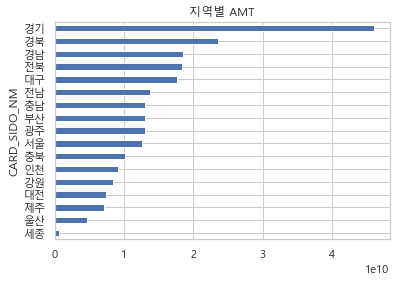

In [7]:
df1 = df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values()
print(df1)
df1.plot(kind="barh")
plt.title("지역별 AMT")

REG_YYMM
201901    16846765168
201902    14862983953
201903    16468348269
201904    15366221250
201905    16826179031
201906    16217769932
201907    15490004307
201908    16117616604
201909    14773738361
201910    14991789060
201911    15836513353
201912    16912863037
202001    16552241320
202002    14931357003
202003    14871611495
Name: AMT, dtype: int64


Text(0.5, 1.0, '기간별 AMT')

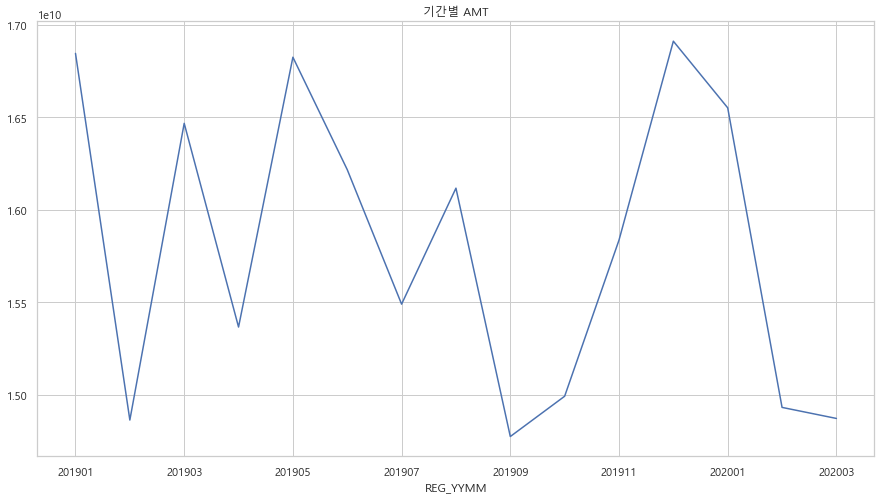

In [8]:
df2 = df.groupby('REG_YYMM')['AMT'].sum()
print(df2)
df2.plot(figsize=(15,8))
plt.title("기간별 AMT")

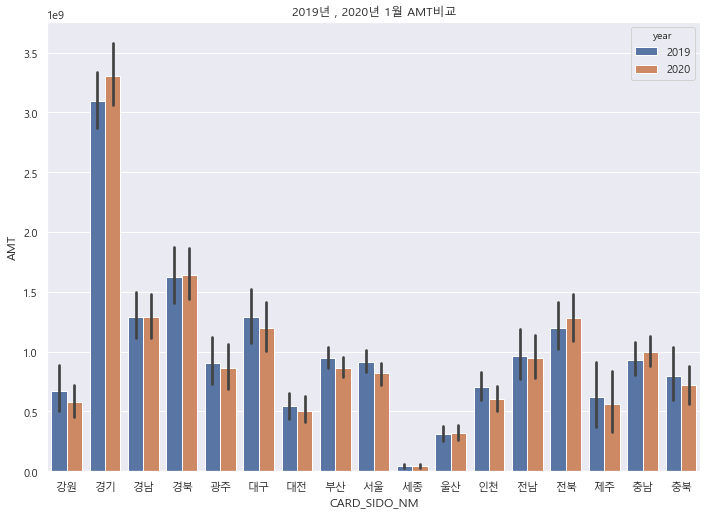

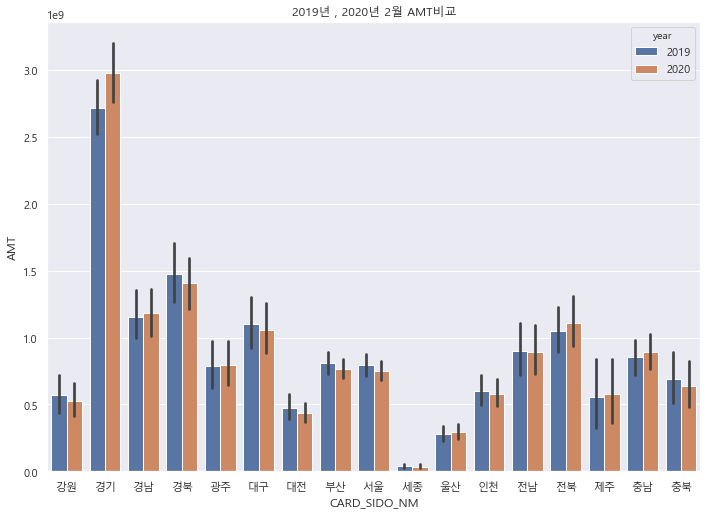

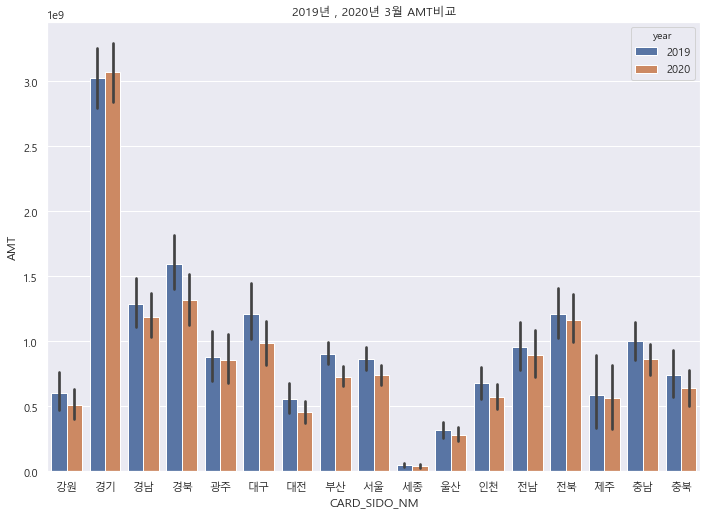

In [9]:
for i in range(1, 4):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

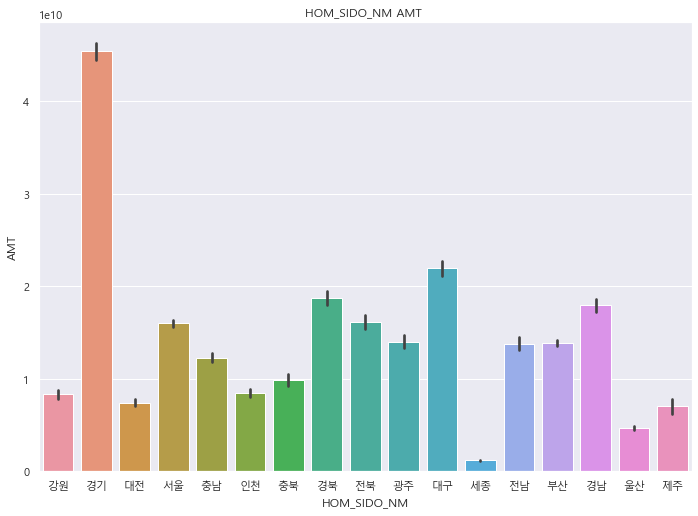

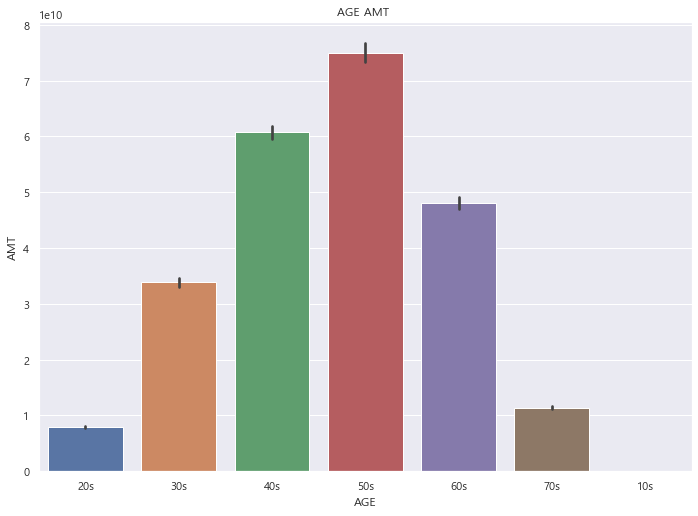

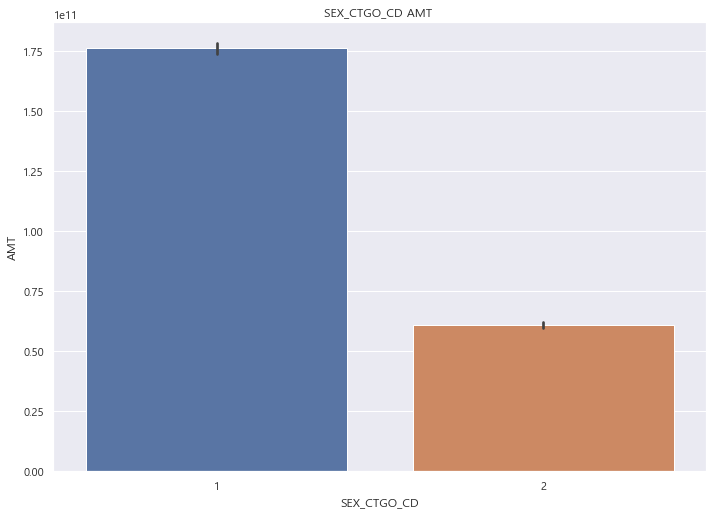

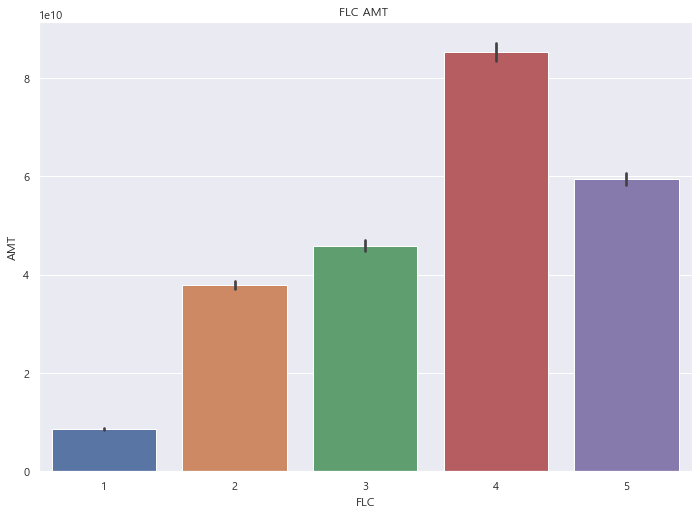

In [10]:
cols = ['HOM_SIDO_NM','AGE','SEX_CTGO_CD', 'FLC']
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df, y = 'AMT', x = val, orient = 'v',estimator = sum)
    plt.title(val +' AMT ')
    plt.show()

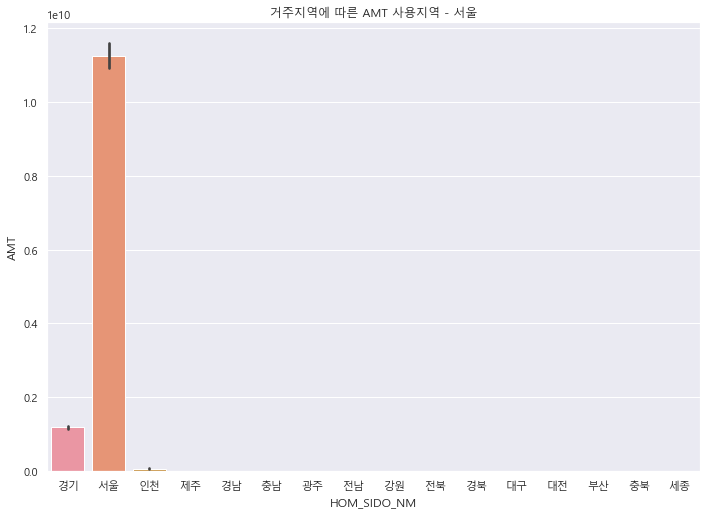

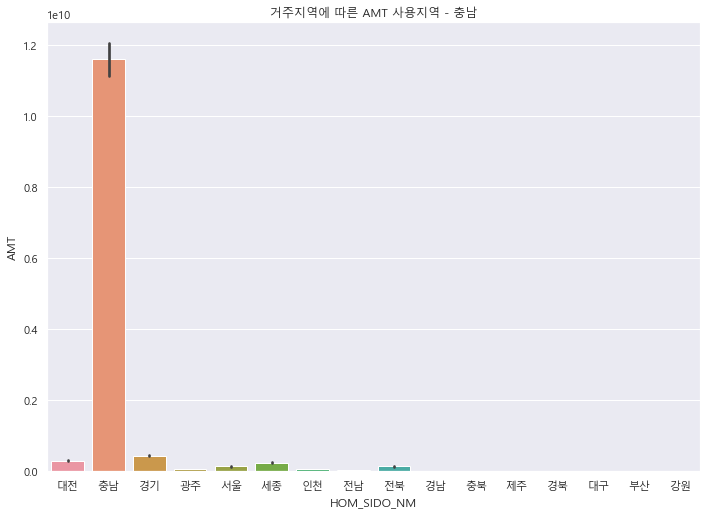

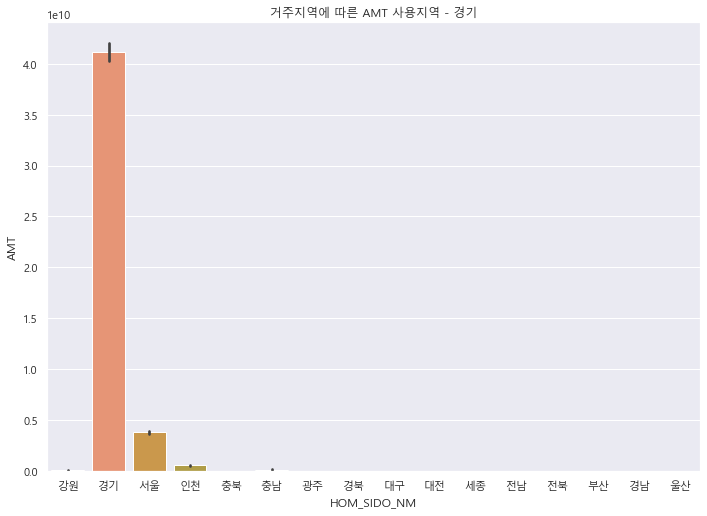

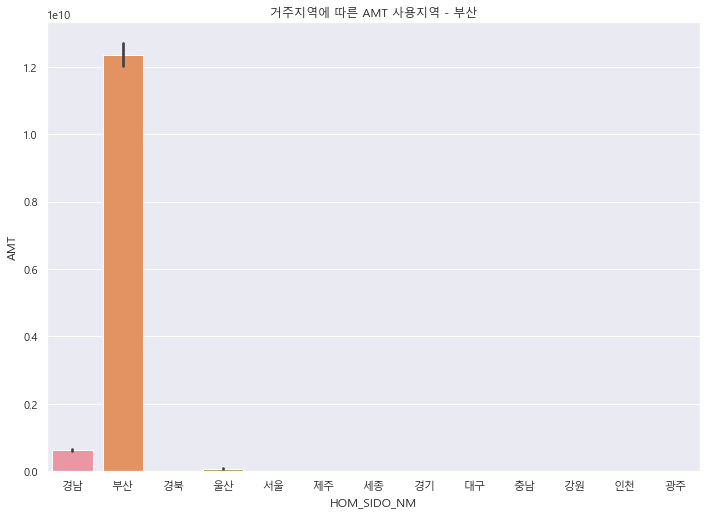

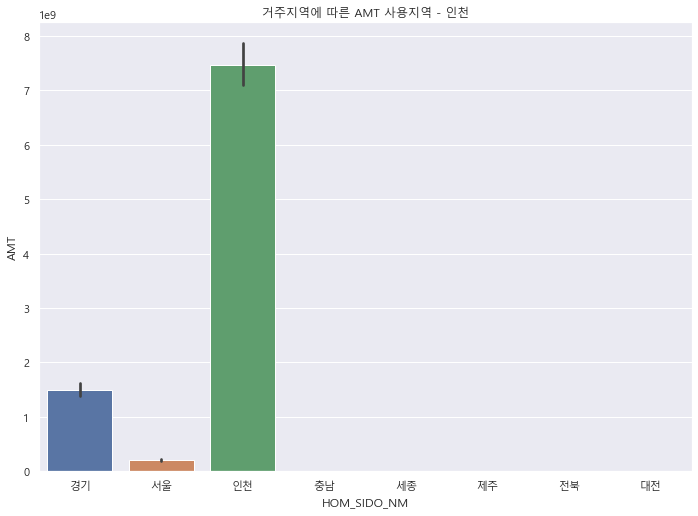

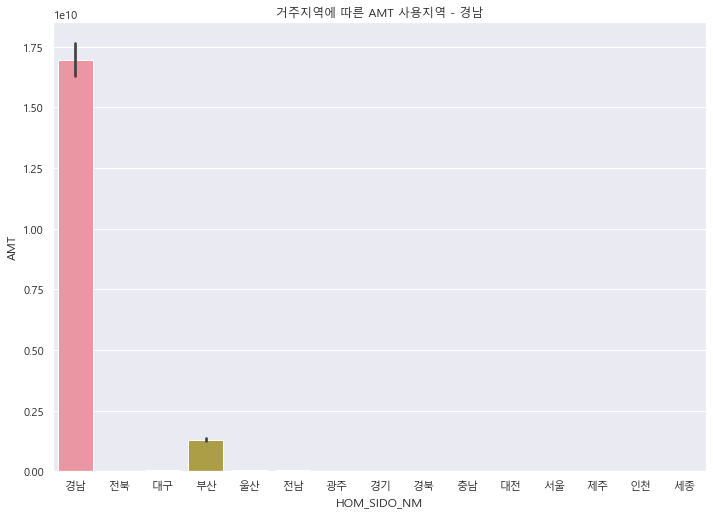

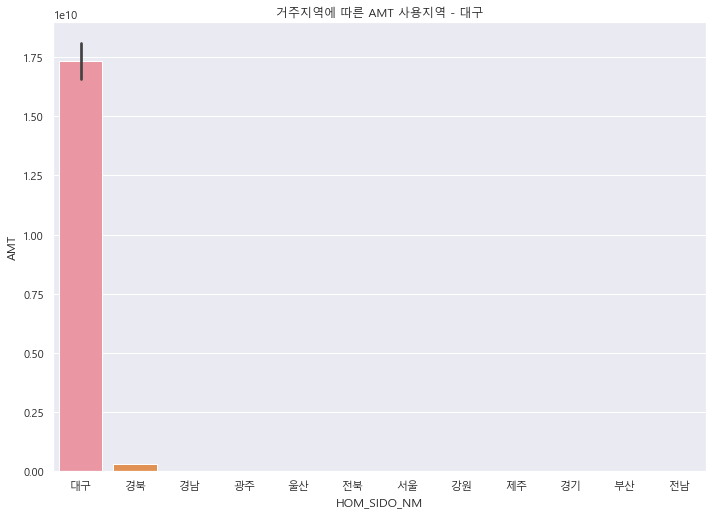

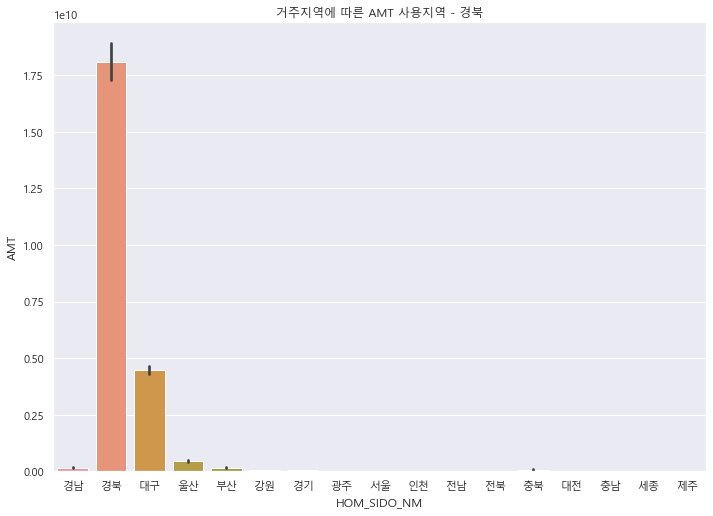

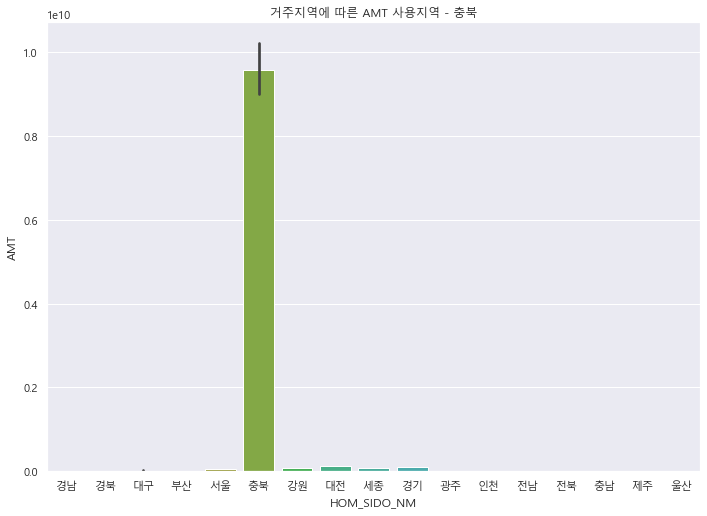

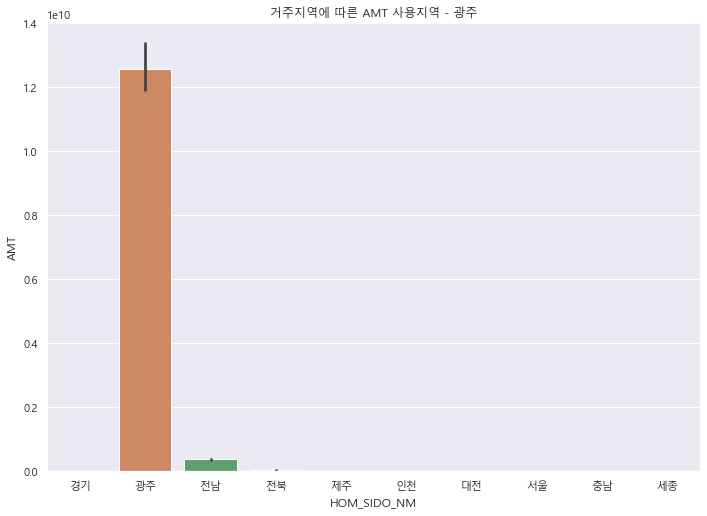

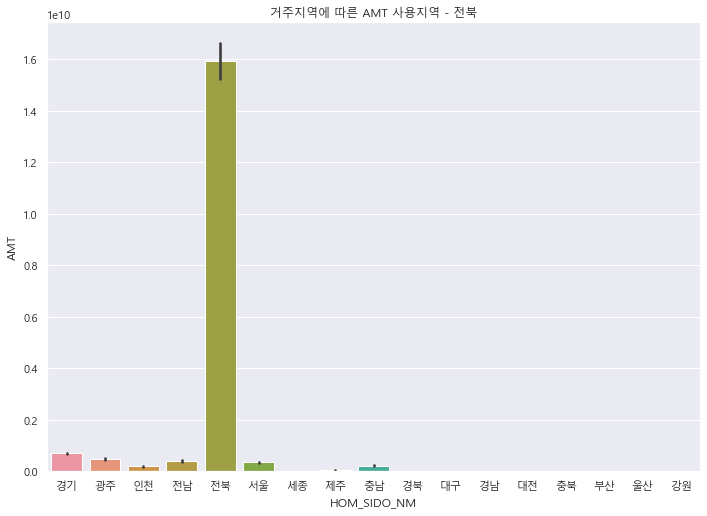

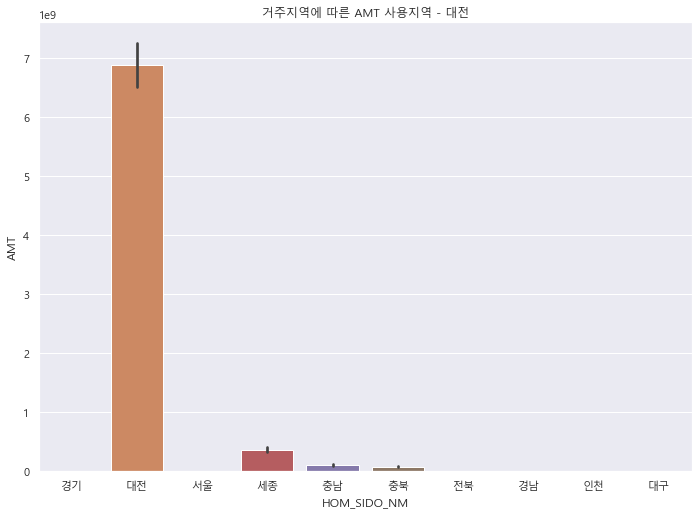

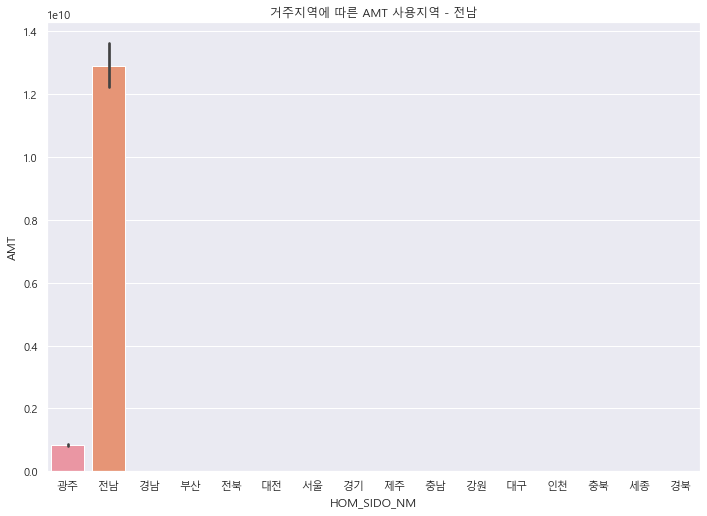

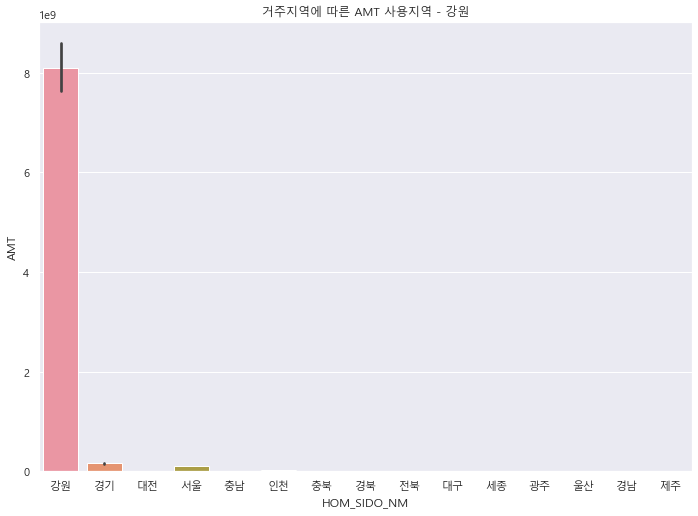

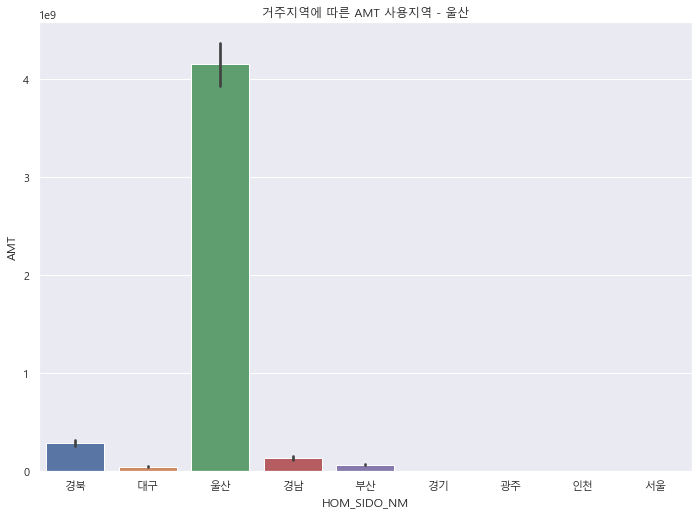

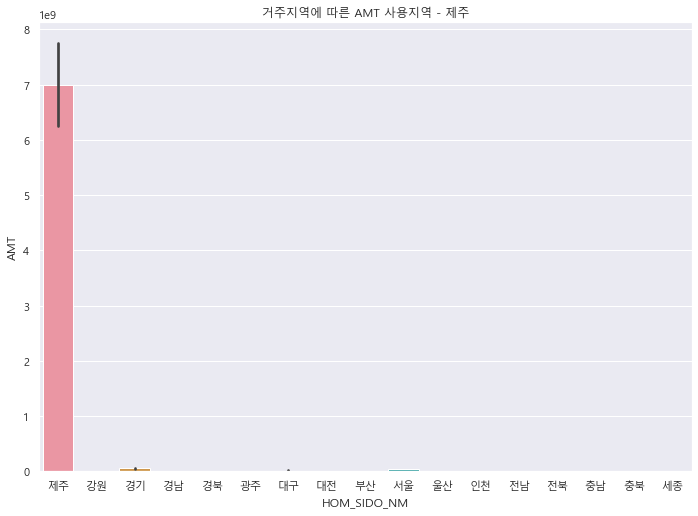

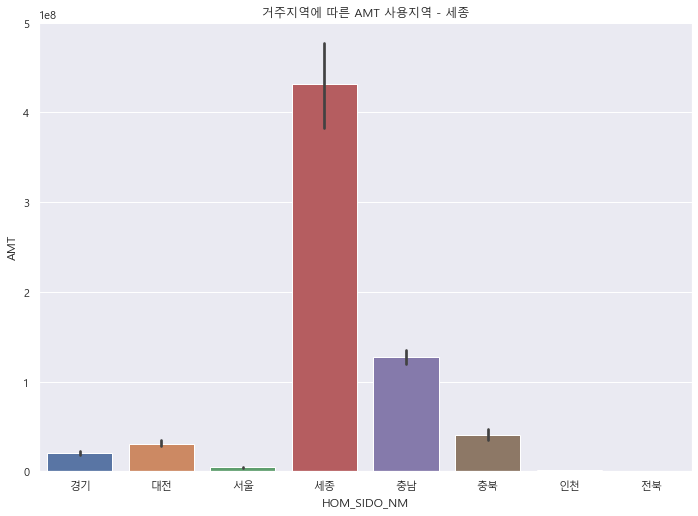

In [11]:
cols = ['서울', '충남', '경기', '부산', '인천','경남', '대구', '경북', '충북', '광주','전북','대전', '전남', '강원', '울산', '제주', '세종']
    
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df[df.CARD_SIDO_NM == val], x = 'HOM_SIDO_NM', y = 'AMT',  estimator = sum)
    plt.title('거주지역에 따른 AMT 사용지역 - ' + val)
    plt.show()